# A Study of The Opioid Drug Epidemic in the United States

## **Motivation**

Opioid-related deaths are steadily on the incline in the United States of America.  We hope to understand if this is due to individual consumption and abuse, or is are doctors and health professionals prescribing this drug at an alarming rate? If the latter, can other drugs or methods of treating be utilized to avoid the abuse of opioids that is leading to the deaths of more and mor people every year?  Additionally, are there enough readily available resources to those who suffer from Opioid Addiction? 

## **Dataset Composition**

This project utilized many different datasets, focusing on the State of Connecticut, and variables/information that can help share the story of individuals and areas of the state that are affected by Opioids, the prescription levels and relating data regarding hopspitalizations and discharges from rehab centers where patients were either treated for or prescribed Opioid drugs.

The following datasets were utilized in exploring the data and inevitably developing machine learning models to strengthen the narrative that the individuals in the United States becoming addicted to Opioids and possibly overdosing on the same drug can be prevented through additional resoures and the lowering of prescription rates from health professionals

1) [Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv](https://www.kaggle.com/izzykayu/opioids-and-drug-deaths)  
2) [Opioid_Related_Treatment_Admissions_by_Town_in_Department_of_Mental_Health_and_Addiction_Services_Programs](https://www.kaggle.com/izzykayu/opioids-and-drug-deaths)  
3) [Pharmacies_offering_Narcan__Evzio_and_other_brands_of_Naloxone](https://www.kaggle.com/izzykayu/opioids-and-drug-deaths)  
4) [VSRR_Provisional_Drug_Overdose_Death_Counts copy](https://www.kaggle.com/izzykayu/opioids-and-drug-deaths)  
5) [Accidental_Drug_Related_Deaths_2012-2018.csv](https://data.ct.gov/Health-and-Human-Services/Accidental-Drug-Related-Deaths-2012-2018/rybz-nyjw)


•Experiment results [10]: Show the ML experiments that you've run, the outcomes, and any error analysis that you've done.  

•Research questions [20]: Which of the research questions have you tried to answer that you came up with during your proposal?

•Next steps [10]: Given your preliminary results, what are the next steps that you're considering?

•Contributions [10]: By now it should be clear what each person has done/ will do next. Please include a section that describes what each team member worked on and contributed to the project and will contribute in the coming weeks. Each member of the team should have a fair share of the work for the development of a successful project. If a member has not contributed, that should be clearly written as well.

## Exploratory Data Analysis  
- ***Data Visualizations***
- ***General Findings in the data before applying any Machine Learning techniques***

In [37]:
# !pip install folium
# !pip install geopandas
# !pip install plotly

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import json
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
import numpy as np
import os
#os.getcwd()


In [38]:
#Read in the dataset loan_data.csv
Prescriber = pd.read_csv('data/Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv')
Treatment = pd.read_csv('data/Opioid_Related_Treatment_Admissions_by_Town_in_Department_of_Mental_Health_and_Addiction_Services_Programs.csv')
Naloxone = pd.read_csv('data/Pharmacies_offering_Narcan__Evzio_and_other_brands_of_Naloxone.csv')
Overdose = pd.read_csv('data/VSRR_Provisional_Drug_Overdose_Death_Counts copy.csv')

### Connecticut Opioid Prescribing Rate by ZIP Code
Changing the Prescriber dataset to equal *df* for ease of analysis/coding

In [39]:
Prescriber = pd.read_csv('data/Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv')

df = Prescriber

#Cleaning the Percentage Column
def p2f(x):
    return float(x.strip('%'))/100

rate = list(df['Opioid Prescribing Rate'])

new_rates = []
for n in rate:
    if isinstance(n,str):
        n_new = p2f(n)
        new_rates.append(n_new)
    else:
        new_rates.append(n)
new_rates

df['Opioid Prescribing Rate'] = new_rates

#fill na values with the mean of the respective column
df['Opioid Prescribing Rate'].fillna(df['Opioid Prescribing Rate'].mean(),inplace = True)
df['Opioid Claim Count'].fillna(df['Opioid Claim Count'].mean(),inplace = True)

df.head()

,NPI,NPPES Provider Last/Org Name,NPPES Provider First Name,NPPES Provider Zip Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,1952310666,A'BODJEDI,ENENGE,6902,CT,Psychiatry,4476,0.000000,0.000000
1,1922419209,AAMAR,ALI,6708,CT,Student in an Organized Health Care Education/...,91,63.100863,0.114216
2,1336297894,AARON,STUART,6880,CT,Ophthalmology,388,0.000000,0.000000
3,1417991456,AARONSON,BETH,6810,CT,Physical Medicine and Rehabilitation,378,123.000000,0.325400
4,1285925305,AARONSON,NICOLE,6510,CT,Student in an Organized Health Care Education/...,87,19.000000,0.218400


In [40]:

df['NPPES Provider Zip Code'] = df['NPPES Provider Zip Code'].astype(str)
df['NPPES Provider Zip Code'] = df['NPPES Provider Zip Code'].str.zfill(5)

df.columns = ['NPI', 'NPPES Provider Last/Org Name', 'NPPES Provider First Name',
       'ZIPCode', 'NPPES Provider State',
       'Specialty Description', 'Total Claim Count', 'Opioid Claim Count',
       'Opioid Prescribing Rate']

ct = gpd.read_file('data/ct_connecticut_zip_codes_geo.min.json')

ct.columns = ['STATEFP10', 'ZIPCode', 'GEOID10', 'CLASSFP10', 'MTFCC10',
       'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'PARTFLG10', 'geometry']

ct['coords'] = ct['geometry'].apply(lambda x: x.representative_point().coords[:])
ct['coords'] = [coords[0] for coords in ct['coords']]

map_df = ct.merge(df, on='ZIPCode')

map_df['Opioid Prescribing Rate'].fillna(map_df['Opioid Prescribing Rate'].mean(),inplace = True)
map_df['Opioid Claim Count'].fillna(map_df['Opioid Claim Count'].mean(),inplace = True)





<ipython-input-41-83d1689ba416>:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ct_opioid_rate.annotate(s=row['ZIPCode'], xy=row['coords'],


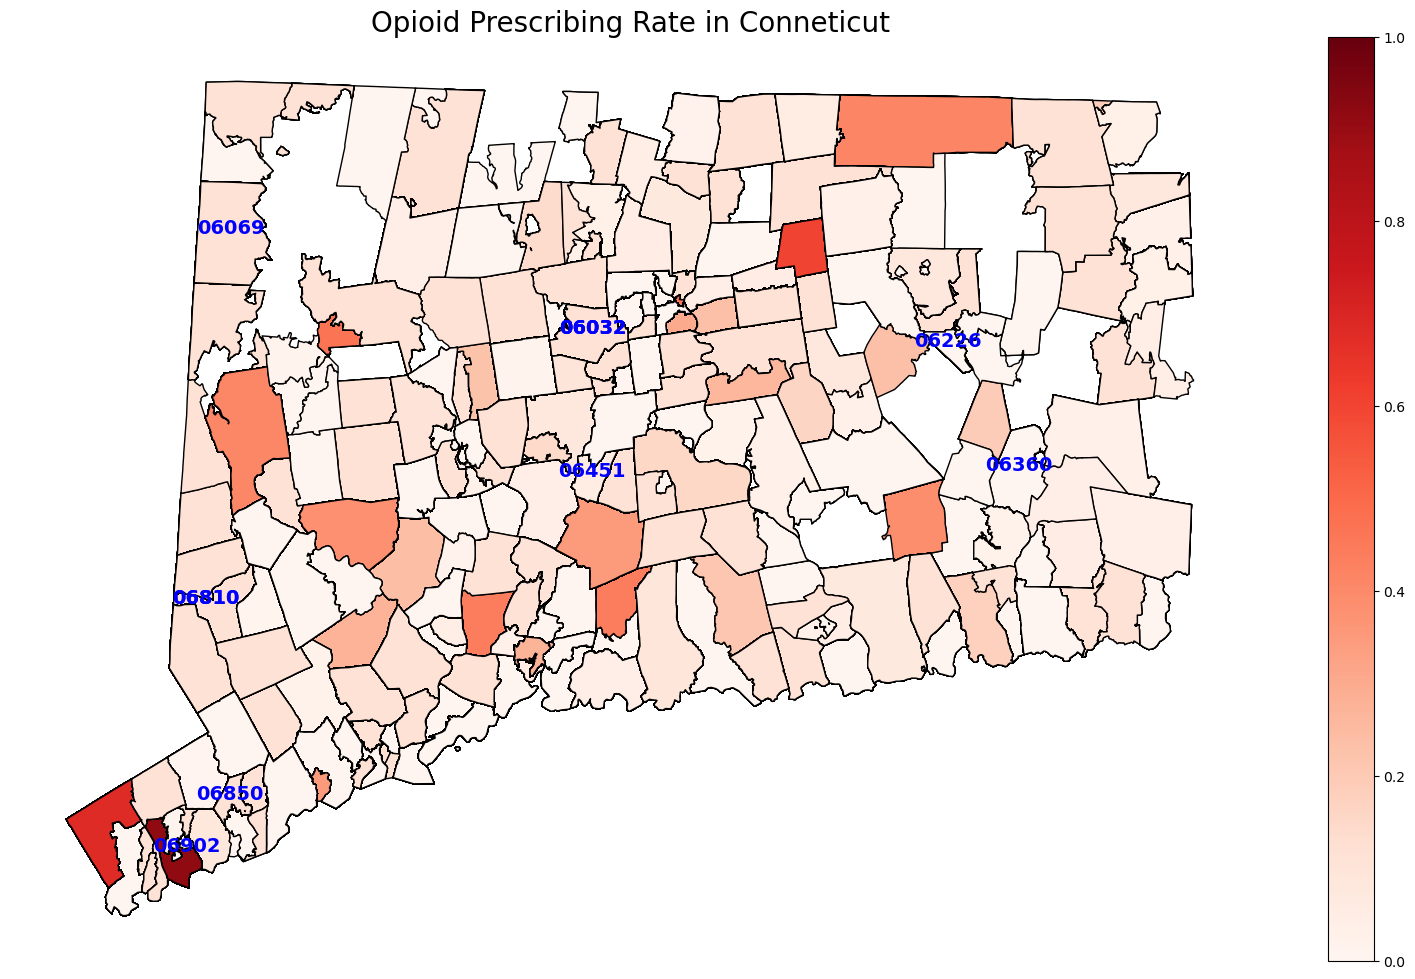

In [41]:
ct_opioid_rate = map_df.plot(column = map_df['Opioid Prescribing Rate'],cmap = 'Reds',edgecolor = 'black',figsize=(20,12),
                        legend = True,vmin = 0,vmax = 1)

ct_opioid_rate.axis('off')
ct_opioid_rate.set_title("Opioid Prescribing Rate in Conneticut",fontsize = 20)

for idx, row in map_df.iterrows():
    if row['Opioid Prescribing Rate'] > 0.90:
        ct_opioid_rate.annotate(s=row['ZIPCode'], xy=row['coords'],
                     horizontalalignment='center',fontsize = 14,weight = 'bold',color ='blue') 
        
sns.set(font_scale = 0.5)

In [42]:
#average rate
map_df['Opioid Prescribing Rate'].mean()

0.11284646306852202

In [43]:
#Quick statistics on our columns on interest
map_df.describe()[['Total Claim Count','Opioid Claim Count','Opioid Prescribing Rate']]

,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
count,15227.000000,15227.000000,15227.000000
mean,970.243712,64.754955,0.112846
std,2360.845235,165.482827,0.145017
min,11.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000
50%,150.000000,58.000000,0.114216
75%,726.500000,63.100863,0.114216
max,56919.000000,6240.000000,1.000000


In [44]:
#Top 20 Zip Codes in CT with respect to the Opioid Prescribing Rates
sort = pd.DataFrame(map_df.sort_values(by = 'Opioid Prescribing Rate',ascending = False))
sort[['ZIPCode','Opioid Prescribing Rate']].head(20)

,ZIPCode,Opioid Prescribing Rate
13934,06032,1.0000
13884,06032,1.0000
12918,06451,1.0000
13926,06032,1.0000
534,06810,0.9688
2399,06360,0.9412
198,06810,0.9310
6376,06069,0.9167
1276,06902,0.9167
12286,06850,0.9167


### Opioid Epidemic in Connecticut - Health Professional Office Description (Top 20)

In [45]:
Prescriber = pd.read_csv('data/Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv')

df = Prescriber

#Cleaning the Percentage Column
def p2f(x):
    return float(x.strip('%'))/100

rate = list(df['Opioid Prescribing Rate'])

new_rates = []
for n in rate:
    if isinstance(n,str):
        n_new = p2f(n)
        new_rates.append(n_new)
    else:
        new_rates.append(n)
new_rates

df['Opioid Prescribing Rate'] = new_rates

#fill na values with the mean of the respective column
df['Opioid Prescribing Rate'].fillna(df['Opioid Prescribing Rate'].mean(),inplace = True)
df['Opioid Claim Count'].fillna(df['Opioid Claim Count'].mean(),inplace = True)

df2 = df.groupby(by = 'Specialty Description').mean()[['Total Claim Count','Opioid Claim Count','Opioid Prescribing Rate']]

df2.reset_index(inplace = True)

In [46]:
#Top 20 Specialities - Opioid Prescribing Rate
df3 = df2.sort_values(by = 'Opioid Prescribing Rate',ascending = False).head(20)

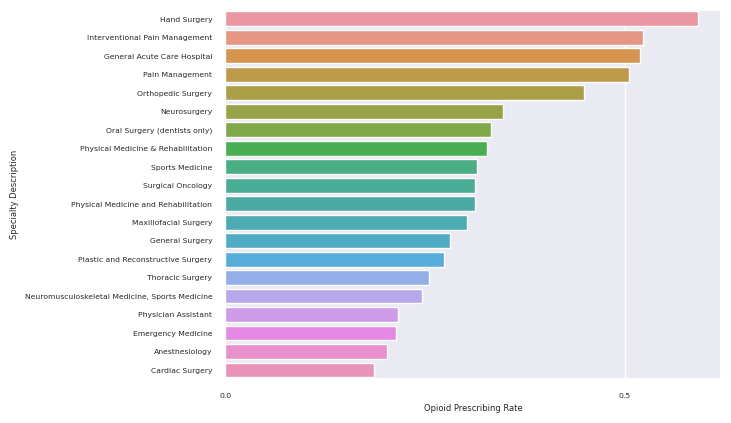

In [47]:
sns.barplot(data=df3,y='Specialty Description',x = 'Opioid Prescribing Rate')
sns.set(rc={'figure.figsize':(25,20)})
sns.set(font_scale = 10)

# df = Overdose

In [48]:
sns.reset_defaults()

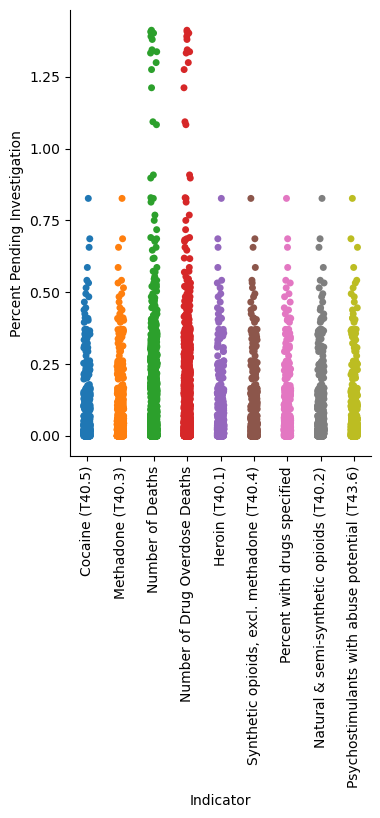

In [49]:
Overdose = pd.read_csv('data/VSRR_Provisional_Drug_Overdose_Death_Counts copy.csv')
df = Overdose
chart = sns.catplot(x = "Indicator", y = "Percent Pending Investigation", hue = 'Indicator', data = df)
chart.set_xticklabels(rotation = 90)
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 2)

# df = TREATMENT

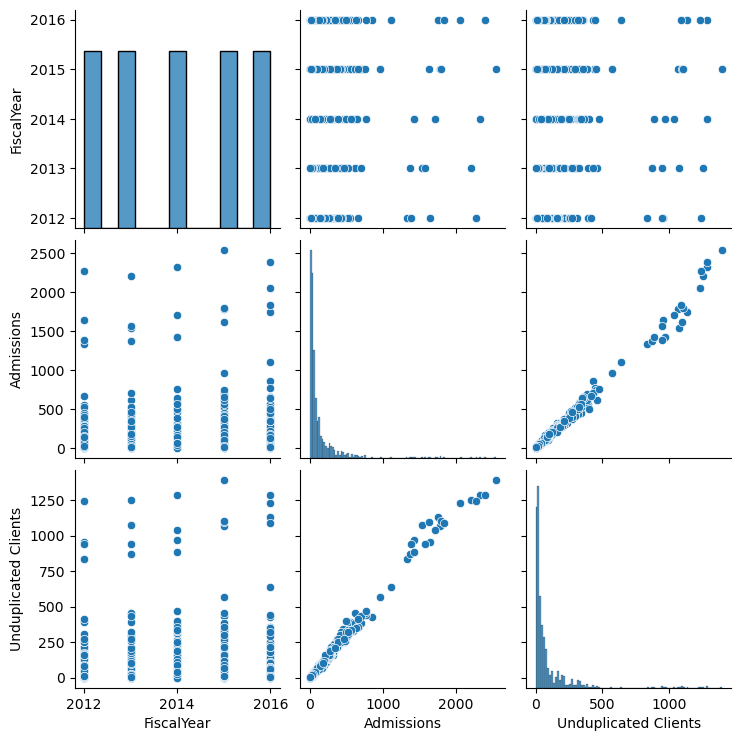

In [50]:
sns.reset_defaults()
Treatment = pd.read_csv('data/Opioid_Related_Treatment_Admissions_by_Town_in_Department_of_Mental_Health_and_Addiction_Services_Programs.csv')
Opioid_treatment = Treatment 
sns.pairplot(Opioid_treatment)

## Machine Learning 

#### Identifying the areas that are at high risk of having drug related fatalities

- ***Machine Learning Models Employed***

   SVC, Random Forest Classification
   
    
- ***Models that we may use in the future***

    Logistic Regression, Classification Trees

In [51]:
Prescriber = pd.read_csv('data/Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv')
# Identify reports / entries that will have a greater claim count (x > 1000)
Prescriber['Total Claim Count'] = np.digitize(Prescriber['Total Claim Count'],bins=[1000])
total = Prescriber[['Specialty Description','Opioid Claim Count','Opioid Prescribing Rate','Total Claim Count','NPPES Provider Zip Code']]
total = total.dropna()
# remove % symbol
OPR = []
for i in total['Opioid Prescribing Rate']:
    i = i.replace('%','')
    OPR.append(float(i))
total['OPR'] = OPR  

In [52]:
y = total['Total Claim Count']
X = total[['Opioid Claim Count','OPR', 'NPPES Provider Zip Code']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=555)

In [53]:
from sklearn import ensemble


svc = svm.SVC().fit(X_train,y_train)
preds_svc = svc.predict(X_test)

rfc = ensemble.RandomForestClassifier().fit(X_train,y_train)
preds_rfc = rfc.predict(X_test)

print(metrics.classification_report(y_test, preds_svc))
print()
print(metrics.classification_report(y_test, preds_rfc))


              precision    recall  f1-score   support

           0       0.80      0.99      0.88       829
           1       0.86      0.21      0.34       261

    accuracy                           0.80      1090
   macro avg       0.83      0.60      0.61      1090
weighted avg       0.81      0.80      0.76      1090


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       829
           1       0.97      0.84      0.90       261

    accuracy                           0.96      1090
   macro avg       0.96      0.92      0.94      1090
weighted avg       0.96      0.96      0.96      1090

